Group 35 Project Proposal

Group Memebers: Kyla, Melika, Henry, Kokoro

Context: Amongst others prevalent diseases, heart disease is one of the dealiest in the world being responsible for 16% of the world's total deaths since 2000. Risk factors for heart disease, include aging, high blood pressure, cholesterol and even stress can increase the risk of having this disease. Other than the high mortality rate, heart disease also attacks the individuals financially causing a financial burdern to their family and future plans.

Content: Using the dataset and targetted risk factors (listed below), we are going to analyze and predict which individuals are most likely to be diagnosed with heart disease.

Question: Does having the targetted risk factors (listed below), increase the chances of an individual getting diagnosed with heart disease?

Targetted Risk Factors: age, chest pain, resting blood pressure, cholesterol, blood surgar, depression, and maxium heart rate.

Data Set Information: The data set was daat collected during the 1988 with four databases: Cleveland, Hungary, Switzerland, and Long Beach. The data set is dowloded fro, kaggle.com (https://www.kaggle.com/johnsmith88/heart-disease-dataset) with the originally set containing 76 attributes. In the dataset downloaded, we are only using 14 of the attributes and only analyzing 7 varibles that could affect the diagnosis of heart disease.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
heart_data <- read_csv("heart_data.csv")

heart_data <- rename(heart_data,
                    chest_pain = cp,
                    blood_pressure = trestbps,
                    cholesterol = chol,
                    blood_sugar = fbs,
                    depression = oldpeak,
                    max_heart_rate = thalach)

heart_data_selected <- heart_data %>%
                       select(age, chest_pain, blood_pressure, cholesterol, blood_sugar, depression, max_heart_rate, target) %>%
                       mutate(target = as_factor(target))
heart_data_selected

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,chest_pain,blood_pressure,cholesterol,blood_sugar,depression,max_heart_rate,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,3,145,233,1,2.3,150,1
37,2,130,250,0,3.5,187,1
41,1,130,204,0,1.4,172,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,0,144,193,1,3.4,141,0
57,0,130,131,0,1.2,115,0
57,1,130,236,0,0.0,174,0


In [3]:
heart_data_split <- initial_split(heart_data_selected, prop = 0.75, strata = target)
heart_data_train <- training(heart_data_split)
heart_data_test <- testing(heart_data_split)

heart_data_train
heart_data_test

age,chest_pain,blood_pressure,cholesterol,blood_sugar,depression,max_heart_rate,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,3,145,233,1,2.3,150,1
37,2,130,250,0,3.5,187,1
41,1,130,204,0,1.4,172,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,3,110,264,0,1.2,132,0
68,0,144,193,1,3.4,141,0
57,0,130,131,0,1.2,115,0


age,chest_pain,blood_pressure,cholesterol,blood_sugar,depression,max_heart_rate,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,0,120,354,0,0.6,163,1
52,2,172,199,1,0.5,162,1
64,3,110,211,0,1.8,144,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0,124,197,0,0,136,0
59,0,164,176,1,1,90,0
57,1,130,236,0,0,174,0


In [4]:
train_summary <- heart_data_train %>%
                    group_by(target) %>%
                    summarize(n = n(), mean_age = mean(age), mean_blood_pressure = mean(blood_pressure), mean_cholesterol = mean(cholesterol), mean_depression = mean(depression), mean_max_heart_rate = mean(max_heart_rate)) %>%
                    arrange(desc(n))
train_summary

#There is no missing data in our dataset
missing_data <- sum(!complete.cases(heart_data_train))
missing_data

`summarise()` ungrouping output (override with `.groups` argument)



target,n,mean_age,mean_blood_pressure,mean_cholesterol,mean_depression,mean_max_heart_rate
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,124,52.38710,128.8226,241.7339,0.6403226,157.7339
0,104,56.75962,134.6731,255.8750,1.5384615,138.2115


[1] 0

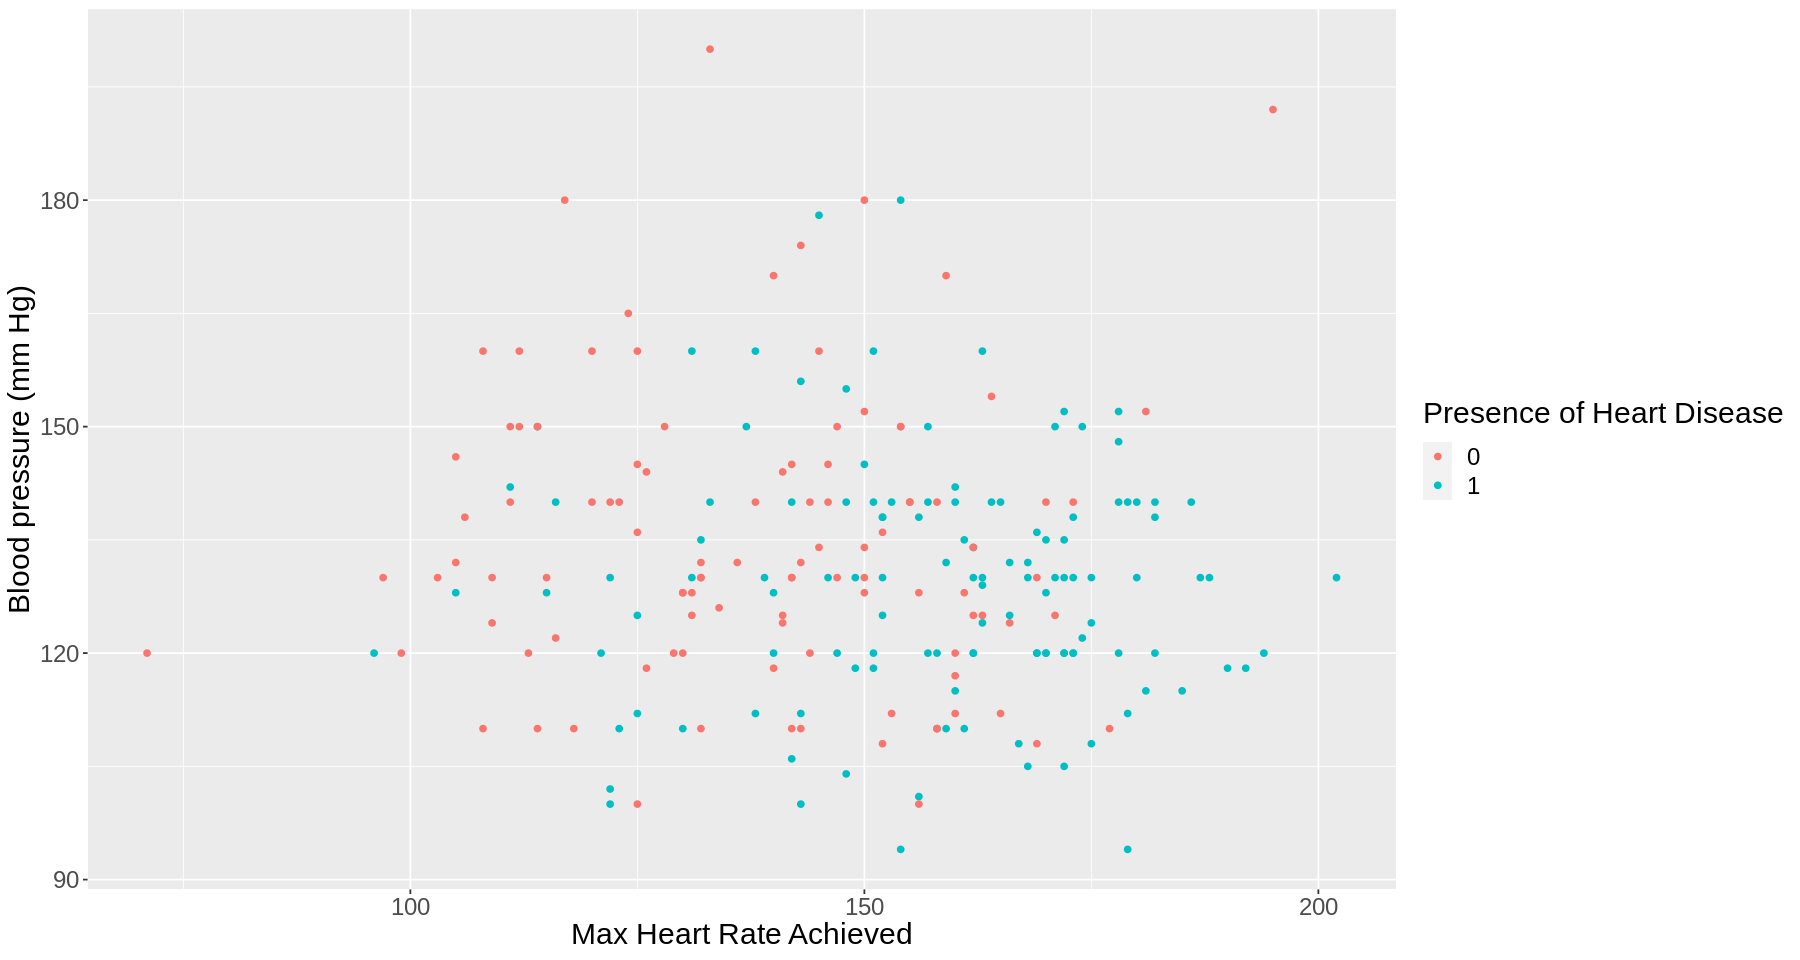

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)
train_plot <- ggplot(heart_data_train, aes(x = max_heart_rate, y = blood_pressure, colour = target)) +
              geom_point() +
              labs(x = "Max Heart Rate Achieved", y = "Blood pressure (mm Hg)", colour = "Presence of Heart Disease") +
              theme(text = element_text(size = 18))
train_plot